In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #for plotting the tree
from sklearn.metrics import roc_curve, auc #for evaluating model by area under curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance
from scipy import stats
from sklearn.inspection import permutation_importance
import shap #for SHAP values


from pdpbox import pdp, info_plots #for plotting


c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
Load data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Data Cleaning
Interpretation of column headers
age: Age of the person

sex:Person's sex 0:female, 1:male

cp: chest pain type 1:typical angina, 2:atypical angina, 3:non=anginal pain, 4:asymptomatic

trestbps: person's resting blood pressure when admitted to hospital (mm Hg )

chol: person's cholestrol in mg/dl

fbs: person's fasting blood sugar 1 when >120 mg/dl, 0 when < 120 mg/dl

restecg: resting ecg measurement 0:normal, 1: having ST-T wave abnormality 2: probable or definite left ventricular hypertrophy

thalach: maximum heart rate achieved

exang: exercise induced angina 1 -yes 0 - no

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment 1: upslopping 2: flat 3: upslopping

ca: number of major blood vessels (0-3)

thal: a disorder 3: normal 6: fixed defect 7: eversible defect

target: heart disease 0: no 1: yes

Renaming column headers for more explanation

In [3]:
dfc1 = df.copy()
dfc1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Renaming columns for more explanation

In [4]:


df.columns = ["age", "sex", "chest_pain_type", "rest_blood_pressure", "cholestrol", "fasting_blood_sugar", "rest_ecg","max_heart_rate", 
             "exercise_induced_angina", "st_depression", "st_slope", "blood_vessel_number","thalassemia", "target"]

print(df.head(5))

n_samples, n_features = df.shape
print("Number of data samples: ", n_samples)
print("Number of features: ", n_features)

   age  sex  chest_pain_type  rest_blood_pressure  cholestrol  \
0   63    1                3                  145         233   
1   37    1                2                  130         250   
2   41    0                1                  130         204   
3   56    1                1                  120         236   
4   57    0                0                  120         354   

   fasting_blood_sugar  rest_ecg  max_heart_rate  exercise_induced_angina  \
0                    1         0             150                        0   
1                    0         1             187                        0   
2                    0         0             172                        0   
3                    0         1             178                        0   
4                    0         1             163                        1   

   st_depression  st_slope  blood_vessel_number  thalassemia  target  
0            2.3         0                    0            1       1  
1   

In [5]:
Check teh unique values in target variable

In [79]:

print("No.of classifications are ", dfc1['target'].nunique())


No.of classifications are  2


Detaisl of dataset

Counter({1: 165, 0: 138})
Missing features
Missing Values:  False
Missing Value Count:  0


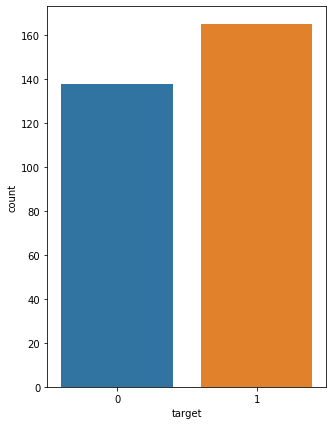

In [96]:
import collections
SamplesbyLabel = collections.Counter(dfc1['target'])
print(SamplesbyLabel)

print("Missing features")

print("Missing Values: ", dfc1.isnull().values.any())
print("Missing Value Count: ", dfc1.isnull().sum().sum())

dfc1.describe(include = 'all')

f, ax = plt.subplots(figsize = (5,7))
ax = sns.countplot(x = "target", data =dfc1)
plt.show()

STtistics of the ground truth

In [138]:
dfpos = df[df['target']== 1]
dfneg = df[df['target']== 0]
dfpos.describe()
print( " Statistics for positive classes \n \n" , dfpos.describe())

dfneg.describe()
print( " Statistics for negative classes \n \n" , dfneg.describe())

 Statistics for positive classes 
 
               age         sex  rest_blood_pressure  cholestrol  \
count  165.000000  165.000000           165.000000  165.000000   
mean    52.496970    0.563636           129.303030  242.230303   
std      9.550651    0.497444            16.169613   53.552872   
min     29.000000    0.000000            94.000000  126.000000   
25%     44.000000    0.000000           120.000000  208.000000   
50%     52.000000    1.000000           130.000000  234.000000   
75%     59.000000    1.000000           140.000000  267.000000   
max     76.000000    1.000000           180.000000  564.000000   

       fasting_blood_sugar    rest_ecg  max_heart_rate  \
count           165.000000  165.000000      165.000000   
mean              0.139394    0.593939      158.466667   
std               0.347412    0.504818       19.174276   
min               0.000000    0.000000       96.000000   
25%               0.000000    0.000000      149.000000   
50%               0.

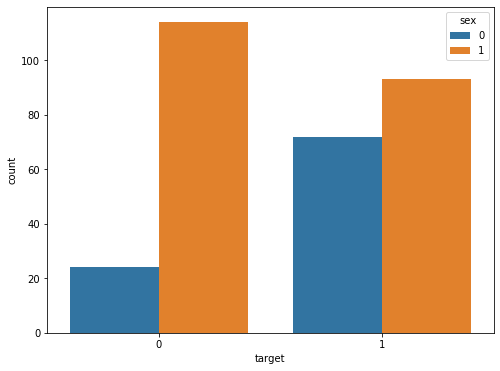

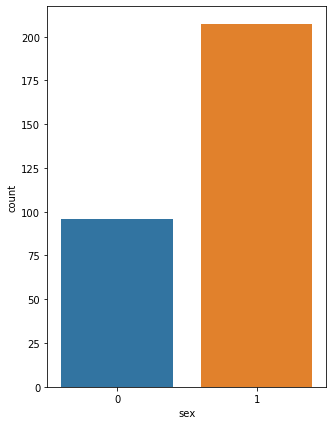

Total Male Count  =  207
Total Female Count  =  96


In [16]:
df.groupby('target')['sex'].value_counts()
f, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = 'target', hue = 'sex', data =df)
plt.show()

f, ax = plt.subplots(figsize = (5,7))
ax = sns.countplot(x = "sex", data =df)
plt.show()

male_count = len(df[df["sex"] ==1])
female_count = len(df[df["sex"] ==0])

print ("Total Male Count  = ", male_count)
print ("Total Female Count  = ", female_count)

###### More male patients are prone to heart attack. There are 99 female patients and 204 male paitents and hence the result.

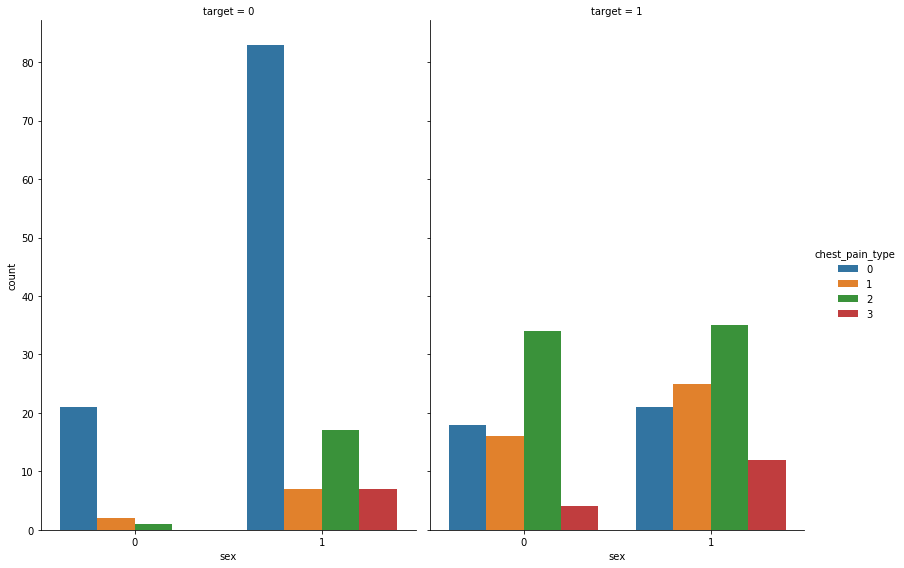

In [17]:

g = sns.catplot(x = 'sex', hue = 'chest_pain_type', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7 )


###### The data shows that patients with type 2 chest_pain (anginal_pain) are more prone to heart disease.

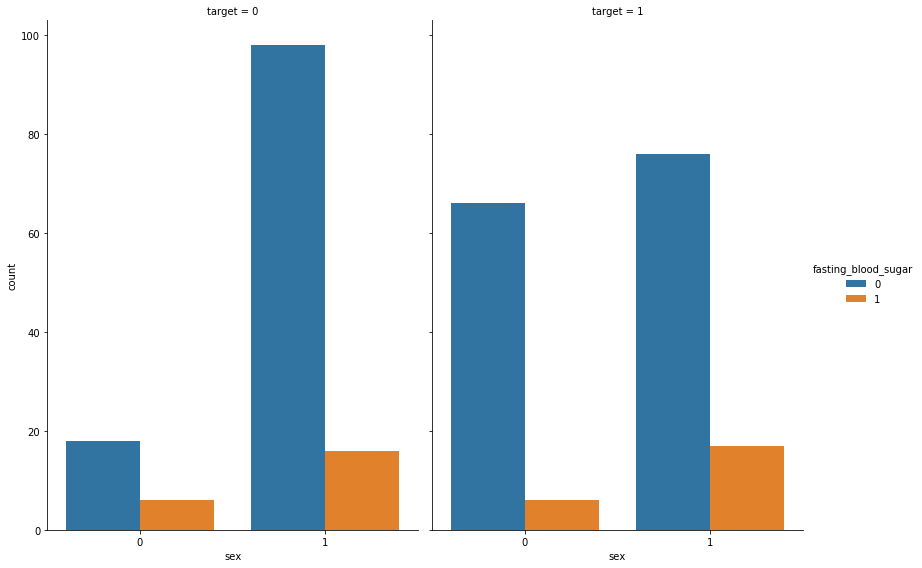

In [18]:

g = sns.catplot(x = 'sex', hue = 'fasting_blood_sugar', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7 )

###### Hight sugar level in blood has a very low corelation to getting a heart attack.

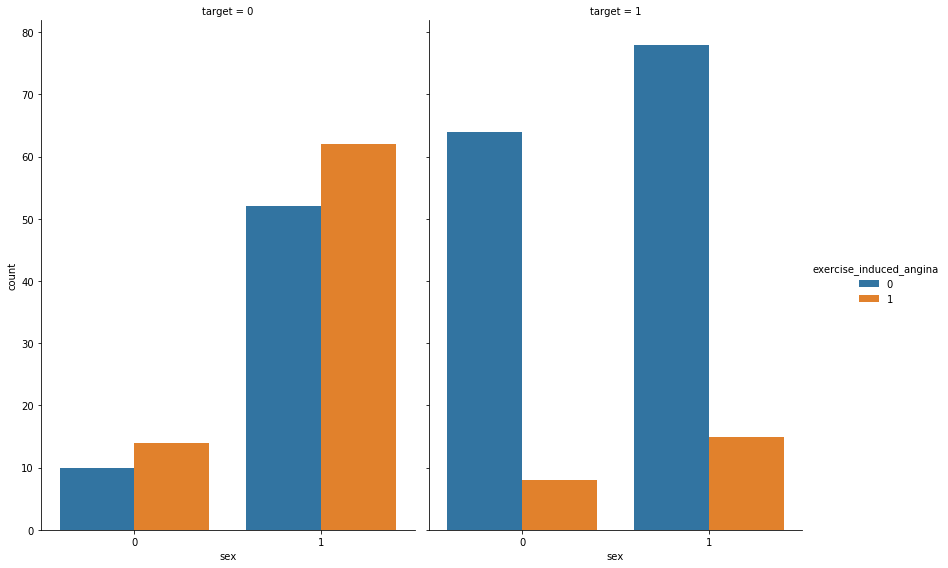

In [19]:

g = sns.catplot(x = 'sex', hue = 'exercise_induced_angina', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7 )

###### Patients with exercise induced angina do not seem to get a heart attack.

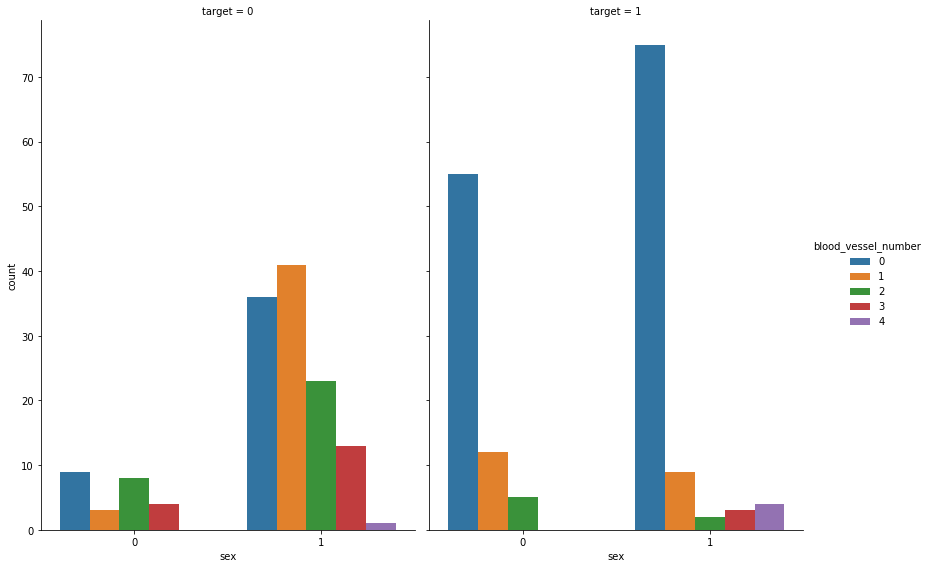

In [20]:

g = sns.catplot(x = 'sex', hue = 'blood_vessel_number', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7 )

###### In case of number of blood vessels, more the merrier. Patients with 0 blood vessel count have high chances of heart attack. 

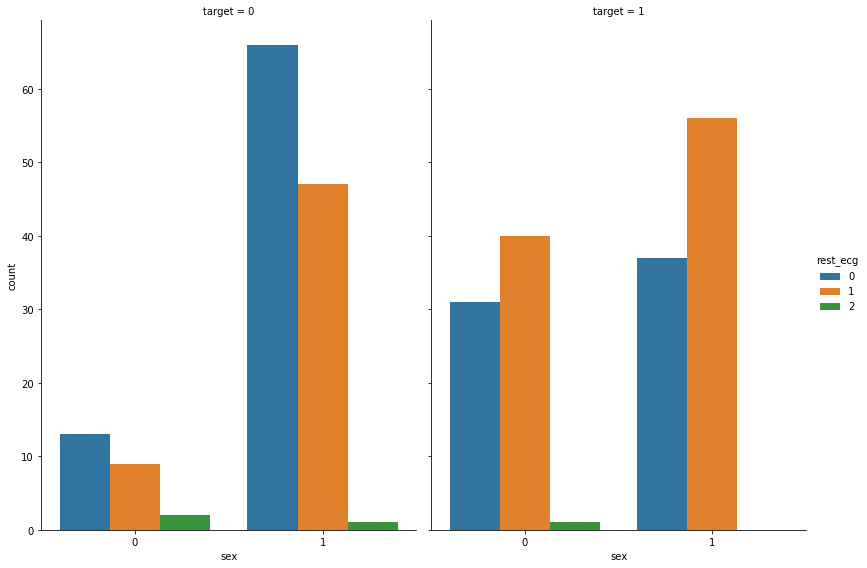

In [22]:

g = sns.catplot(x = 'sex', hue = 'rest_ecg', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7)

###### Showing abnormalities in restecg measurement constituted to hear disease.

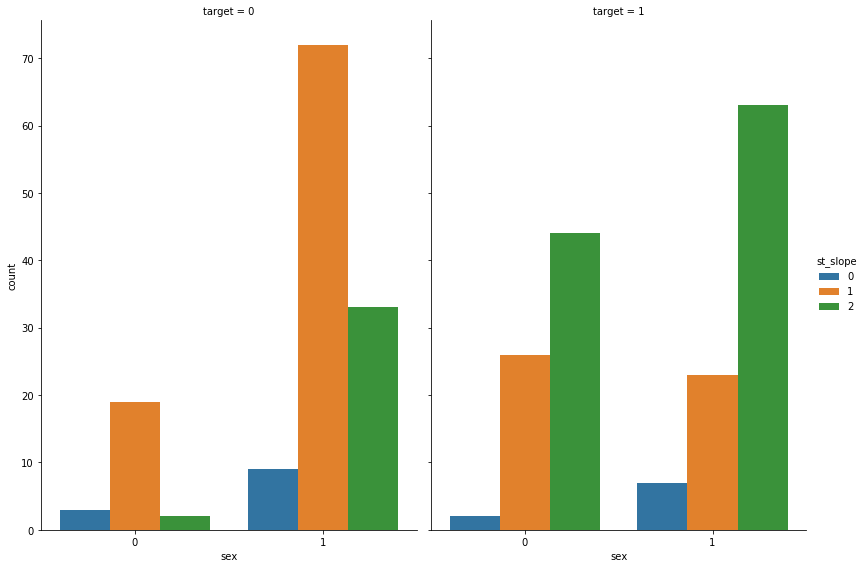

In [23]:

g = sns.catplot(x = 'sex', hue = 'st_slope', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7)

###### Chances of getting a heart disease is higher when there is a downward slope.

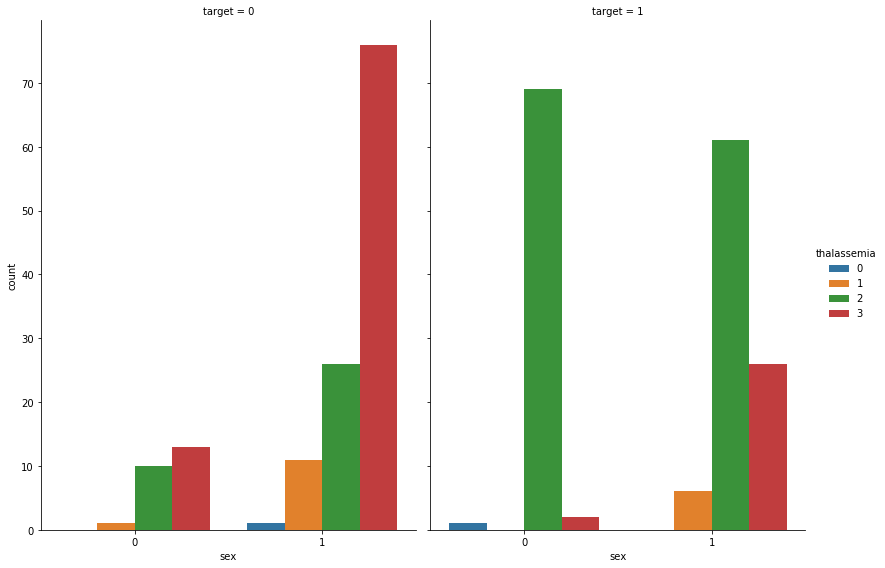

In [24]:

g = sns.catplot(x = 'sex', hue = 'thalassemia', col = 'target',
                data = df, kind = 'count', height = 8, aspect =.7)

###### Patients(both male and female) with the thalassemia disorder has great changes for heart attack with 

Average age of people with heart disease for the two sexes

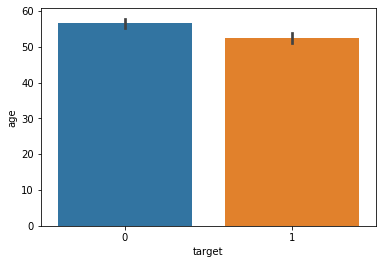

In [25]:

sns.barplot(x = 'target', y = 'age', data = df)

In [142]:
categorical_val = []
continuous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
chest_pain_type : [3 2 1 0]
rest_blood_pressure : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholestrol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 

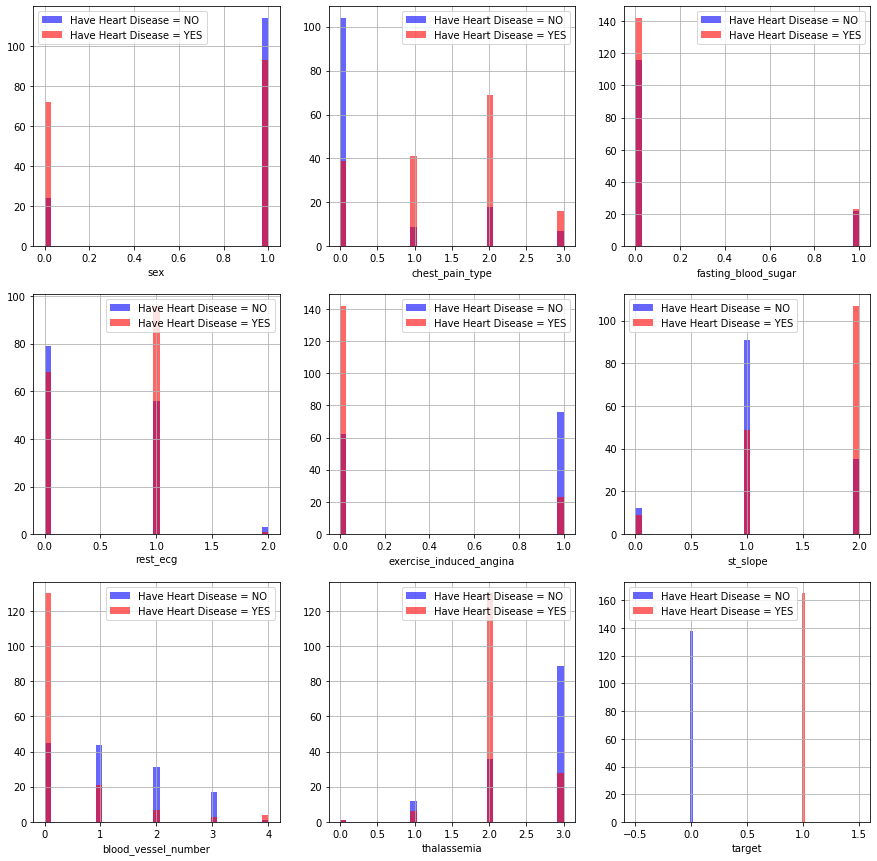

In [144]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.savefig("Analysis2.png")

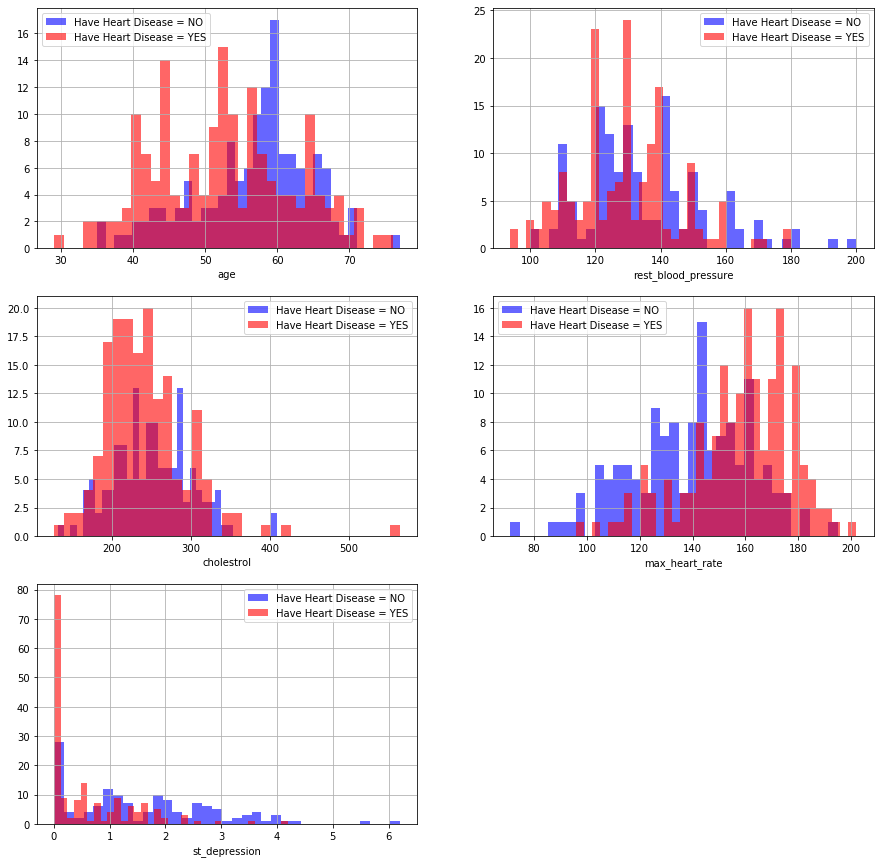

In [145]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.savefig("Analysis1.png")

###### Adding dummies for categorical values

In [5]:


df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'


df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [6]:

df.dtypes
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')





In [7]:

df = pd.get_dummies(df)
df.head()
df.columns
df.to_csv("Encodedheart.csv")

In [19]:
dftotal = pd.read_csv("Encodedheart.csv")
dftotal.head()



age  sex  rest_blood_pressure  cholestrol  fasting_blood_sugar  rest_ecg  \
0   63    1                  145         233                    1         0   
1   37    1                  130         250                    0         1   
2   41    0                  130         204                    0         0   
3   56    1                  120         236                    0         1   
4   57    0                  120         354                    0         1   

   max_heart_rate  exercise_induced_angina  st_depression  st_slope  \
0             150                        0            2.3         0   
1             187                        0            3.5         0   
2             172                        0            1.4         2   
3             178                        0            0.8         2   
4             163                        1            0.6         2   

   blood_vessel_number  target  chest_pain_type_asymptomatic  \
0                    0       1                             1   
1                    0       1                             0   
2                    0       1                             0   
3                    0       1                             0   
4                    0       1                             0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 0   
1                                0                                 1   
2                                1                                 0   
3                                1                                 0   
4                                0                                 0   

   chest_pain_type_typical angina  thalassemia_0  thalassemia_fixed defect  \
0                               0              0                         0   
1                               0              0                         1   
2                               0              0                         1   
3                               0              0                         1   
4                               1              0                         1   

   thalassemia_normal  thalassemia_reversable defect  
0                   1                              0  
1                   0                              0  
2                   0                              0  
3                   0                              0  
4                   0                              0

In [20]:
n_samples, n_features = dftotal.shape

print("Total number of features = ", n_features)

Total number of features =  20


Plotting outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 <a list of 21 Text xticklabel objects>)

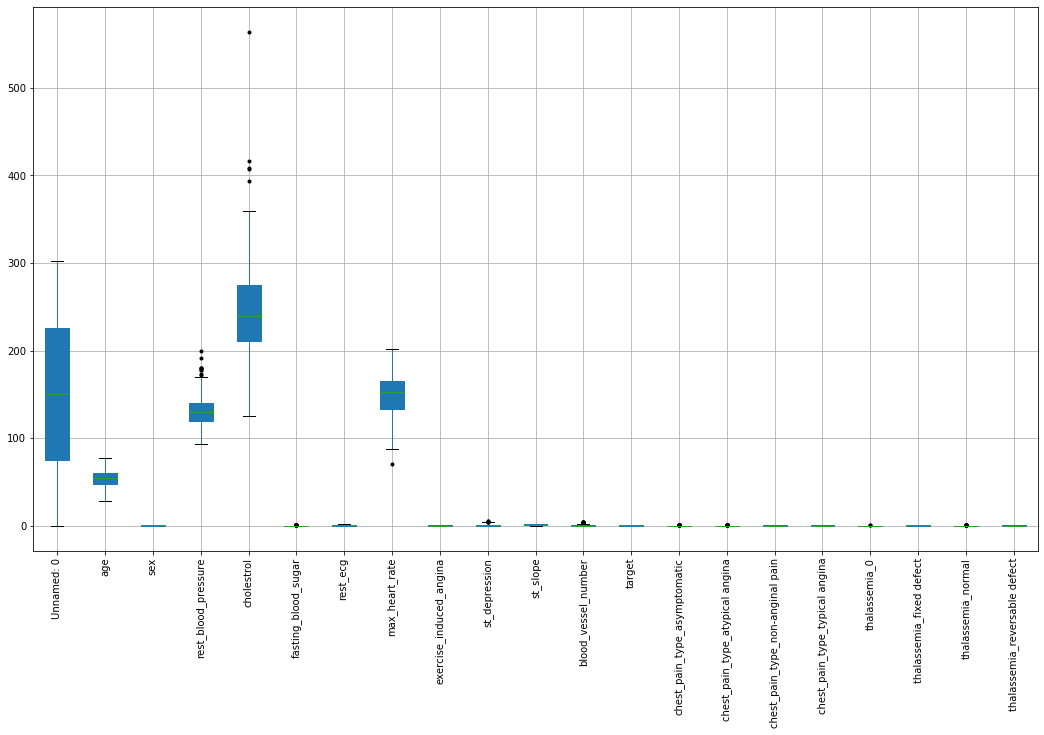

In [7]:
red_square = dict(markerfacecolor='r', marker='s')
plt.subplots(figsize=(18,10))
dftotal.boxplot( patch_artist = True, sym = 'k. ', flierprops= red_square)
plt.xticks(rotation = 90)



Removing the outliers using zscore

For a given data point, Zscore shows the number of standard deviations it is away (above or below) from the population mean.

In [8]:
outlierdf = dftotal[~(np.abs(stats.zscore(dftotal)) < 3). all(axis =1)]
#outlierdf.index.get_loc(outlierdf.iloc[0].name)
print("Outlier Samples")
for rows in outlierdf.index:
    print(rows, "\t")




Outlier Samples
0 	
5 	
13 	
14 	
17 	
19 	
24 	
28 	
34 	
58 	
62 	
63 	
83 	
85 	
92 	
100 	
101 	
106 	
117 	
138 	
147 	
150 	
152 	
158 	
163 	
164 	
170 	
179 	
199 	
204 	
220 	
221 	
222 	
223 	
228 	
242 	
244 	
246 	
247 	
248 	
251 	
254 	
259 	
271 	
272 	
280 	
282 	
286 	
291 	
292 	
294 	
297 	
299 	


In [21]:
dftotal.columns

Index(['age', 'sex', 'rest_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'blood_vessel_number', 'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'thalassemia_0',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect'],
      dtype='object')

Prepare data fopr testing and training

In [24]:
import collections

X = dftotal.drop("target", axis = 1)
Y = dftotal["target"]
Columnlist = list(X.columns) # listing out the feature(column names) from sample dataColumnlist
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, shuffle =True) #to make the results deterministic use random_state = 0/42
print("Training data: ", X_train.shape)
print("Testing data ", X_test.shape)
print("Labels in Training Samples ",y_train.shape,"\n",
    "Labels in Testing Samples ", y_test.shape)

model = RandomForestClassifier(n_estimators =500, max_features = "auto", bootstrap = True, oob_score = True) #oob_score = True
model.fit(X_train,y_train)

print("Training Labels")
print(collections.Counter(y_train))

print("Testing Labels")
print(collections.Counter(y_test))

Training data:  (242, 19)
Testing data  (61, 19)
Labels in Training Samples  (242,) 
 Labels in Testing Samples  (61,)
Training Labels
Counter({1: 131, 0: 111})
Testing Labels
Counter({1: 34, 0: 27})


Performance of the model

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross Validation Scores:",scores)


print("Mean score and the 95% confidence interval of the score estimate")
print("Cross Validation Score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() *2))

#print("Out-Of-Bag Error Estimate: {:.3f}".format(model.oob_score_))

Cross Validation Scores: [0.87755102 0.83673469 0.875      0.8125     0.77083333]
Mean score and the 95% confidence interval of the score estimate
Cross Validation Score: 0.835 (+/- 0.080)


Plotting Tree

In [10]:
print(len(model.estimators_))

500


In [26]:
# EXtract a single decision tree
estimator = model.estimators_[3]
features = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no_disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values


#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=1000)
#tree.plot_tree(estimator, 
 #              feature_names = features, 
  #             class_names = y_train_str,
   #            rounded = True, proportion = False,
    #           filled = True);
#fig.savefig('rf_individualtree.png')




In [27]:
import os
print(os.environ["PATH"])
os.environ["PATH"] += os.pathsep + "C:\\Users\\laksh\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\win32\\lib"

c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\pywin32_system32;c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\pywin32_system32;c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\pywin32_system32;C:\ProgramData\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files (x86)\Graphviz2.38\bin;C:\Users\laksh\AppData\Local\Microsoft\WindowsApps;;c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs;c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\scipy\.libs;C:\Users\laksh\AppData\Local\Programs\Python\Python36\lib\site-packages\win32\lib;C:\Users\laksh\AppData\Local\Programs\Python\Python36\lib\site-packages\win32\lib


In [28]:
export_graphviz(estimator, out_file = 'tree.dot',
               feature_names = features, 
               class_names = y_train_str,
               rounded = True, proportion = False,
               label = 'root', precision = 2, filled = True)


#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi = 600'])

from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi= 400']) 

from IPython.display import Image
Image(filename = 'tree.png')



In [29]:
from sklearn.model_selection import RandomizedSearchCV        

random_grid = {'n_estimators': [20,50, 100, 500, 1000,5000],
              'max_features': ["log2", "auto"],
             'bootstrap': ['False', 'True']
             }

model_random = RandomizedSearchCV(estimator= model, param_distributions =random_grid, n_iter = 10, cv=3, verbose = 2, error_score = 'raise')
model_random.fit(X_train, y_train)

print("Results for the best hyperparameter")
print(model_random.best_params_)
model_random_results = model_random.cv_results_
print("REsults of randomized hyperparameter tuning")
print(model_random_results)
print("Best parameter score")
print(model_random.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=50, max_features=log2, bootstrap=False .............
[CV]  n_estimators=50, max_features=log2, bootstrap=False, total=   0.2s
[CV] n_estimators=50, max_features=log2, bootstrap=False .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=50, max_features=log2, bootstrap=False, total=   0.1s
[CV] n_estimators=50, max_features=log2, bootstrap=False .............
[CV]  n_estimators=50, max_features=log2, bootstrap=False, total=   0.1s
[CV] n_estimators=500, max_features=auto, bootstrap=False ............
[CV]  n_estimators=500, max_features=auto, bootstrap=False, total=   1.2s
[CV] n_estimators=500, max_features=auto, bootstrap=False ............
[CV]  n_estimators=500, max_features=auto, bootstrap=False, total=   1.0s
[CV] n_estimators=500, max_features=auto, bootstrap=False ............
[CV]  n_estimators=500, max_features=auto, bootstrap=False, total=   1.0s
[CV] n_estimators=20, max_features=log2, bootstrap=True ..............
[CV]  n_estimators=20, max_features=log2, bootstrap=True, total=   0.0s
[CV] n_estimators=20, max_features=log2, bootstrap=True ..............
[CV]  n_estimators=20, max_features=log2, bootstrap=True, total=   0.0s
[CV] n_estimators=20, max_features=log2, bootstrap=True ......

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


Results for the best hyperparameter
{'n_estimators': 500, 'max_features': 'auto', 'bootstrap': 'False'}
REsults of randomized hyperparameter tuning
{'mean_fit_time': array([ 0.13263639,  0.99130448,  0.04853694,  0.04987748,  0.21810945,
        1.14297088,  2.25758092,  1.14943147, 11.82918747,  3.85169864]), 'std_fit_time': array([0.01039792, 0.09255323, 0.01222197, 0.00815834, 0.03297319,
       0.1459416 , 0.21801182, 0.05972378, 0.54885673, 1.58257488]), 'mean_score_time': array([0.00666698, 0.04852335, 0.00432102, 0.00398962, 0.01526729,
       0.05253212, 0.10140824, 0.05184817, 0.80617817, 0.19946647]), 'std_score_time': array([9.26708294e-04, 1.68146162e-03, 4.71933757e-04, 3.20252945e-05,
       1.89818183e-03, 8.70255506e-03, 9.94575503e-03, 5.09834029e-03,
       2.79039776e-01, 1.01603218e-01]), 'param_n_estimators': masked_array(data=[50, 500, 20, 20, 100, 500, 1000, 500, 5000, 1000],
             mask=[False, False, False, False, False, False, False, False,
             

In [30]:
prediction = model.predict(X_test)

print("Confusion Matrix")
conf_matrix = confusion_matrix(y_test,prediction)
print(conf_matrix)

print("Classification Report")
print(classification_report(y_test,prediction))

print("Train Accuracy Score")
print(model.score(X_train, y_train))

print("Test Accuracy Score")
print(model.score(X_test, y_test))


Confusion Matrix
[[21  6]
 [ 6 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Train Accuracy Score
1.0
Test Accuracy Score
0.8032786885245902


<function matplotlib.pyplot.show(*args, **kw)>

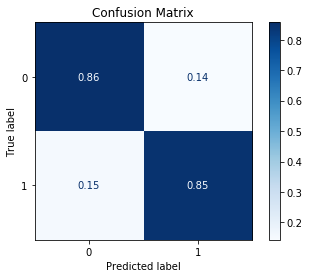

In [40]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title("Confusion Matrix") 
plt.show

Feature Importance by gini

In [41]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns = ['Importance']).sort_values('Importance', ascending = False)
print(feature_importances)

                                  Importance
st_depression                       0.112900
max_heart_rate                      0.103654
thalassemia_fixed defect            0.095943
blood_vessel_number                 0.093473
age                                 0.084767
cholestrol                          0.080340
thalassemia_reversable defect       0.079125
chest_pain_type_typical angina      0.076216
rest_blood_pressure                 0.075165
st_slope                            0.048634
exercise_induced_angina             0.046276
sex                                 0.027095
chest_pain_type_non-anginal pain    0.017609
rest_ecg                            0.017505
chest_pain_type_asymptomatic        0.013982
fasting_blood_sugar                 0.012859
chest_pain_type_atypical angina     0.010127
thalassemia_normal                  0.004329


FEature Importance by permutation 

In [15]:
feature_importances_MDA =  PermutationImportance (model, random_state =1).fit(X_test, y_test)
eli5.show_weights(feature_importances_MDA, feature_names = X_test.columns.tolist())



In [ ]:
feature_importances_MDA =  PermutationImportance (model).fit(X_test, y_test)
eli5.show_weights(feature_importances_MDA, feature_names = X_test.columns.tolist())

Estimating co-relation co-efficients
Computing Pearson's r - standard corelation coefficient between pair of attributes by comparing it with the target variable.

corelation coefficient Value ranges from +1 to -1.

If the value is close to +1, there is a strong postive corelation and when close to -1, there is a strong negative correlation.
When close to 0, there is no corelation. 

target                              1.000000
thalassemia_fixed defect            0.527334
max_heart_rate                      0.421741
st_slope                            0.345877
chest_pain_type_non-anginal pain    0.316742
chest_pain_type_atypical angina     0.245879
rest_ecg                            0.137230
chest_pain_type_asymptomatic        0.086957
fasting_blood_sugar                -0.028046
cholestrol                         -0.085239
thalassemia_normal                 -0.106589
rest_blood_pressure                -0.144931
age                                -0.225439
sex                                -0.280937
blood_vessel_number                -0.391724
st_depression                      -0.430696
exercise_induced_angina            -0.436757
thalassemia_reversable defect      -0.486112
chest_pain_type_typical angina     -0.516015
Name: target, dtype: float64


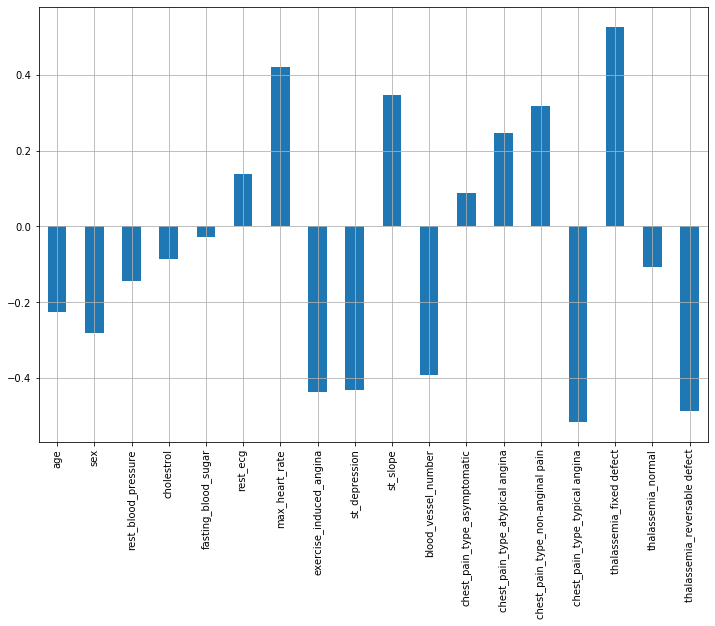

In [48]:
correlation = dftotal.corr()
print(correlation['target'].sort_values(ascending=False))

dftotal.drop('target', axis =1).corrwith(dftotal.target).plot(kind = 'bar',grid = 'True', figsize = (12,8))

Heatmap - to find correlation of features

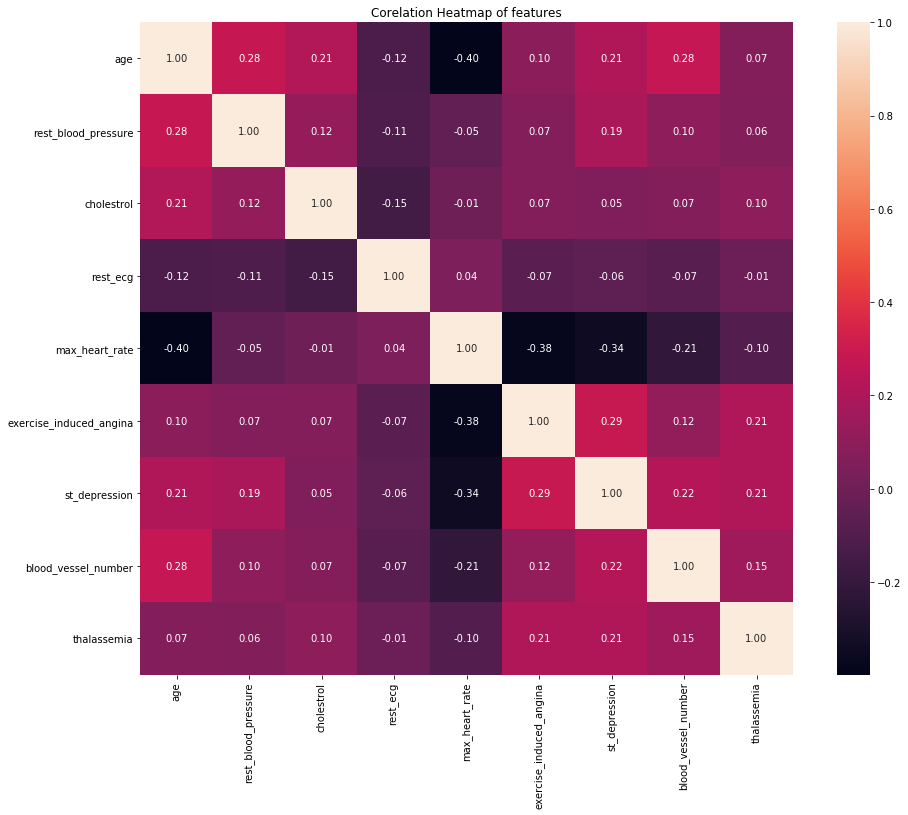

In [30]:
df1 = df.drop(['target', 'sex', 'chest_pain_type', 'fasting_blood_sugar', 'st_slope'],   axis = 1)
fig, ax = plt.subplots(figsize = (16,12))
plt.title("Corelation Heatmap of features")
ax = sns.heatmap(df1.corr(), annot= True, square = True, fmt = '.2f')

plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()
hfigure = ax.get_figure()
hfigure.savefig("heatmapfigure.png", dpi = 400)

Listing the feature and its weights

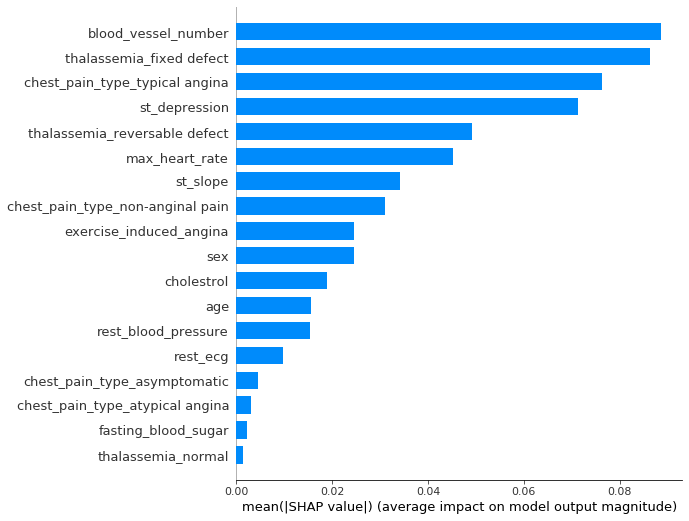

In [49]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type = "bar")

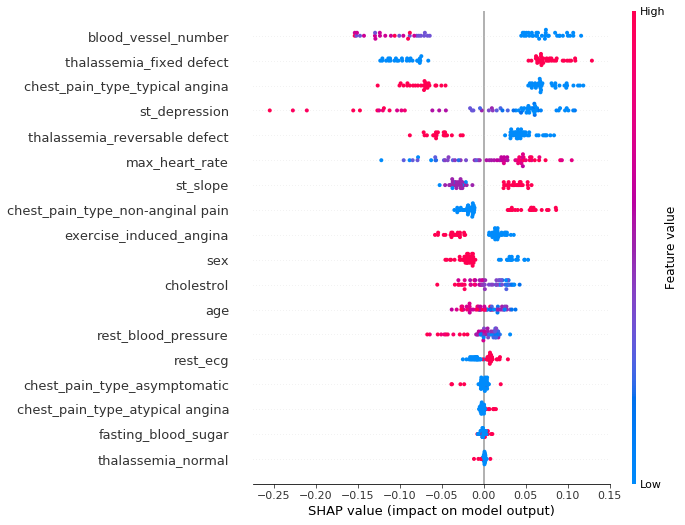

In [51]:
shap.summary_plot(shap_values[1], X_test)





In [116]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [119]:

data_for_prediction = dftotal.iloc[37,:]
heart_disease_risk_factors(model, data_for_prediction)



In [120]:
data_for_prediction = dftotal.iloc[186,:]
heart_disease_risk_factors(model, data_for_prediction)

In [121]:
data_for_prediction = dftotal.iloc[302,:]
heart_disease_risk_factors(model, data_for_prediction)

In [115]:
data_for_prediction = X_test.iloc[37,:]
heart_disease_risk_factors(model, data_for_prediction)

NameError: name 'heart_disease_risk_factors' is not defined

In [ ]:
Modifying list ot include only to 5 features

In [50]:
columns = [ 'chest_pain_type_typical angina', 'target']
df1 = pd.DataFrame(dftotal, columns=columns)

n1_samples,n1_features = df1.shape
print("Sample Size", n1_samples)


X1 = df1.drop("target", axis = 1)
Y1 = df1["target"]
print("Sample data with top 5 features \n \n" , X1.head)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.2, shuffle = True)
model1 = RandomForestClassifier(n_estimators = 500, max_features = 1, bootstrap = True, oob_score = True)
model1.fit(X1_train, y1_train)

scores1 = cross_val_score(model1, X1_train, y1_train, cv=3)
print("Cross Validation Scores:",scores1)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.3f (+/- %0.3f) \n \n" % (scores1.mean(), scores1.std() *2))

print("Out-Of-Bag Error Estimate: {:.3f} \n \n".format(model1.oob_score_))

prediction1 = model1.predict(X1_test)


print("Confusion Matrix \n \n")
conf_matrix1 = confusion_matrix(y1_test,prediction1)
print(conf_matrix1)

print("Classification Report \n \n")
print(classification_report(y1_test,prediction1))

Sample Size 303
Sample data with top 5 features 
 
 <bound method NDFrame.head of      chest_pain_type_typical angina
0                                 0
1                                 0
2                                 0
3                                 0
4                                 1
..                              ...
298                               1
299                               0
300                               1
301                               1
302                               0

[303 rows x 1 columns]>
Cross Validation Scores: [0.83950617 0.7037037  0.7125    ]
Mean score and the 95% confidence interval of the score estimate 
 

Cross Validation Score: 0.752 (+/- 0.124) 
 

Out-Of-Bag Error Estimate: 0.752 
 

Confusion Matrix 
 

[[25  4]
 [ 9 23]]
Classification Report 
 

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy       

In [51]:
columns = ['blood_vessel_number', 'chest_pain_type_typical angina', 'target']
df2 = pd.DataFrame(dftotal, columns=columns)

n2_samples,n2_features = df2.shape
print("Sample Size", n2_samples)


X2 = df2.drop("target", axis = 1)
Y2 = df2["target"]
print("Sample data with top 5 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, shuffle = True)
model2 = RandomForestClassifier(n_estimators = 500, max_features = 2, bootstrap = True, oob_score = True)
model2.fit(X2_train, y2_train)

scores2 = cross_val_score(model2, X2_train, y2_train, cv=3)
print("Cross Validation Scores:",scores2)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.3f (+/- %0.3f) \n \n" % (scores2.mean(), scores2.std() *2))

print("Out-Of-Bag Error Estimate: {:.3f} \n \n".format(model2.oob_score_))

prediction2 = model2.predict(X2_test)


print("Confusion Matrix \n \n")
conf_matrix2 = confusion_matrix(y2_test,prediction2)
print(conf_matrix2)

print("Classification Report \n \n")
print(classification_report(y2_test,prediction2))


Sample Size 303
Sample data with top 5 features 
 
 <bound method NDFrame.head of      blood_vessel_number  chest_pain_type_typical angina
0                      0                               0
1                      0                               0
2                      0                               0
3                      0                               0
4                      0                               1
..                   ...                             ...
298                    0                               1
299                    0                               0
300                    2                               1
301                    1                               1
302                    1                               0

[303 rows x 2 columns]>
Cross Validation Scores: [0.75308642 0.69135802 0.6875    ]
Mean score and the 95% confidence interval of the score estimate 
 

Cross Validation Score: 0.711 (+/- 0.060) 
 

Out-Of-Bag Error Estimate: 0.657 


In [52]:
columns = ['blood_vessel_number', 'chest_pain_type_typical angina', 'st_depression', 'target']
df3 = pd.DataFrame(dftotal, columns=columns)

n3_samples,n3_features = df3.shape
print("Sample Size", n3_samples)


X3 = df3.drop("target", axis = 1)
Y3 = df3["target"]
print("Sample data with top 5 features \n \n" , X3.head)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.2, shuffle = True)
model3 = RandomForestClassifier(n_estimators = 500, max_features = 3, bootstrap = True, oob_score = True)
model3.fit(X3_train, y3_train)

scores3 = cross_val_score(model3, X3_train, y3_train, cv=3)
print("Cross Validation Scores:",scores3)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.3f (+/- %0.3f) \n \n" % (scores3.mean(), scores3.std() *2))

print("Out-Of-Bag Error Estimate: {:.3f} \n \n".format(model3.oob_score_))

prediction3 = model3.predict(X3_test)


print("Confusion Matrix \n \n")
conf_matrix3 = confusion_matrix(y3_test,prediction3)
print(conf_matrix3)

print("Classification Report \n \n")
print(classification_report(y3_test,prediction3))


Sample Size 303
Sample data with top 5 features 
 
 <bound method NDFrame.head of      blood_vessel_number  chest_pain_type_typical angina  st_depression
0                      0                               0            2.3
1                      0                               0            3.5
2                      0                               0            1.4
3                      0                               0            0.8
4                      0                               1            0.6
..                   ...                             ...            ...
298                    0                               1            0.2
299                    0                               0            1.2
300                    2                               1            3.4
301                    1                               1            1.2
302                    1                               0            0.0

[303 rows x 3 columns]>
Cross Validation Scores: [0.8

In [63]:
columns = ['blood_vessel_number', 'chest_pain_type_typical angina', 'sex', 'st_depression','target']
df4 = pd.DataFrame(dftotal, columns=columns)

n4_samples,n4_features = df4.shape
print("Sample Size", n4_samples)


X4 = df4.drop("target", axis = 1)
Y4 = df4["target"]
print("Sample data with top 5 features \n \n" , X4.head)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size = 0.2, shuffle = True)
model4 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model4.fit(X4_train, y4_train)

scores4 = cross_val_score(model4, X4_train, y4_train, cv=3)
print("Cross Validation Scores:",scores4)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.4f (+/- %0.4f) \n \n" % (scores4.mean(), scores4.std() *2))

print("Out-Of-Bag Error Estimate: {:.4f} \n \n".format(model4.oob_score_))

prediction4 = model4.predict(X4_test)


print("Confusion Matrix \n \n")
conf_matrix4 = confusion_matrix(y4_test,prediction4)
print(conf_matrix4)

print("Classification Report \n \n")
print(classification_report(y4_test,prediction4))


Sample Size 303
Sample data with top 5 features 
 
 <bound method NDFrame.head of      blood_vessel_number  chest_pain_type_typical angina  sex  st_depression
0                      0                               0    1            2.3
1                      0                               0    1            3.5
2                      0                               0    0            1.4
3                      0                               0    1            0.8
4                      0                               1    0            0.6
..                   ...                             ...  ...            ...
298                    0                               1    0            0.2
299                    0                               0    1            1.2
300                    2                               1    1            3.4
301                    1                               1    1            1.2
302                    1                               0    0          

In [65]:
columns = ['blood_vessel_number', 'chest_pain_type_typical angina', 'sex', 'st_depression','target', 'chest_pain_type_nonanginal pain']
df5 = pd.DataFrame(dftotal, columns=columns)

n5_samples,n5_features = df5.shape
print("Sample Size", n5_samples)


X5 = df5.drop("target", axis = 1)
Y5 = df5["target"]
print("Sample data with top 5 features \n \n" , X5.head)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size = 0.2, shuffle = True)
model5 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model5.fit(X5_train, y5_train)

scores5 = cross_val_score(model5, X5_train, y5_train, cv=3)
print("Cross Validation Scores:",scores5)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.5f (+/- %0.5f) \n \n" % (scores5.mean(), scores5.std() *2))

print("Out-Of-Bag Error Estimate: {:.5f} \n \n".format(model5.oob_score_))

prediction5 = model5.predict(X5_test)


print("Confusion Matrix \n \n")
conf_matrix5 = confusion_matrix(y5_test,prediction5)
print(conf_matrix5)

print("Classification Report \n \n")
print(classification_report(y5_test,prediction5))


Sample Size 303
Sample data with top 5 features 
 
 <bound method NDFrame.head of      blood_vessel_number  chest_pain_type_typical angina  sex  st_depression  \
0                      0                               0    1            2.3   
1                      0                               0    1            3.5   
2                      0                               0    0            1.4   
3                      0                               0    1            0.8   
4                      0                               1    0            0.6   
..                   ...                             ...  ...            ...   
298                    0                               1    0            0.2   
299                    0                               0    1            1.2   
300                    2                               1    1            3.4   
301                    1                               1    1            1.2   
302                    1              

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [86]:
columns = ['blood_vessel_number', 'chest_pain_type_typical angina', 'sex','target', 'st_depression','chest_pain_type_non-anginal pain']
df6 = pd.DataFrame(dftotal, columns=columns)

n6_samples,n6_features = df6.shape
print("Sample Size", n6_samples)


X6 = df6.drop("target", axis = 1)
Y6 = df6["target"]
print("Sample data with top 5 features \n \n" , X6.head)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size = 0.2, shuffle = True)
model6 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model6.fit(X6_train, y6_train)

scores6 = cross_val_score(model6, X6_train, y6_train, cv=3)
print("Cross Validation Scores:",scores6)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.5f (+/- %0.5f) \n \n" % (scores6.mean(), scores6.std() *2))

print("Out-Of-Bag Error Estimate: {:.5f} \n \n".format(model6.oob_score_))

prediction6 = model6.predict(X6_test)


print("Confusion Matrix \n \n")
conf_matrix6 = confusion_matrix(y6_test,prediction6)
print(conf_matrix5)

print("Classification Report \n \n")
print(classification_report(y6_test,prediction6))

Sample Size 303
Sample data with top 5 features 
 
 <bound method NDFrame.head of      blood_vessel_number  chest_pain_type_typical angina  sex  st_depression  \
0                      0                               0    1            2.3   
1                      0                               0    1            3.5   
2                      0                               0    0            1.4   
3                      0                               0    1            0.8   
4                      0                               1    0            0.6   
..                   ...                             ...  ...            ...   
298                    0                               1    0            0.2   
299                    0                               0    1            1.2   
300                    2                               1    1            3.4   
301                    1                               1    1            1.2   
302                    1              

In [69]:
columns = ['st_slope','blood_vessel_number', 'chest_pain_type_typical angina', 'sex', 'st_depression','target', 'st_depression','chest_pain_type_non-anginal pain']
df7 = pd.DataFrame(dftotal, columns=columns)

n7_samples,n7_features = df7.shape
print("Sample Size", n7_samples, n7_features)


X7 = df7.drop("target", axis = 1)
Y7 = df7["target"]
print("Sample data with top 5 features \n \n" , X7.head)

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, Y7, test_size = 0.2, shuffle = True)
model7 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model7.fit(X7_train, y7_train)

scores7 = cross_val_score(model7, X7_train, y7_train, cv=3)
print("Cross Validation Scores:",scores7)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.5f (+/- %0.5f) \n \n" % (scores7.mean(), scores7.std() *2))

print("Out-Of-Bag Error Estimate: {:.5f} \n \n".format(model7.oob_score_))

prediction7 = model7.predict(X7_test)


print("Confusion Matrix \n \n")
conf_matrix7 = confusion_matrix(y7_test,prediction7)
print(conf_matrix5)

print("Classification Report \n \n")
print(classification_report(y7_test,prediction7))


Sample Size 303 8
Sample data with top 5 features 
 
 <bound method NDFrame.head of      st_slope  blood_vessel_number  chest_pain_type_typical angina  sex  \
0           0                    0                               0    1   
1           0                    0                               0    1   
2           2                    0                               0    0   
3           2                    0                               0    1   
4           2                    0                               1    0   
..        ...                  ...                             ...  ...   
298         1                    0                               1    0   
299         1                    0                               0    1   
300         1                    2                               1    1   
301         1                    1                               1    1   
302         1                    1                               0    0   

     st_depress

In [70]:
columns = ['max_heart_rate','st_slope','blood_vessel_number', 'chest_pain_type_typical angina', 'sex', 'st_depression','target', 'st_depression','chest_pain_type_non-anginal pain']
df8 = pd.DataFrame(dftotal, columns=columns)

n8_samples,n8_features = df8.shape
print("Sample Size", n8_samples, n8_features)


X8 = df8.drop("target", axis = 1)
Y8 = df8["target"]
print("Sample data with top 5 features \n \n" , X8.head)

X8_train, X8_test, y8_train, y8_test = train_test_split(X8, Y8, test_size = 0.2, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model8.fit(X8_train, y8_train)

scores8 = cross_val_score(model8, X8_train, y8_train, cv=3)
print("Cross Validation Scores:",scores8)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.5f (+/- %0.5f) \n \n" % (scores8.mean(), scores8.std() *2))

print("Out-Of-Bag Error Estimate: {:.5f} \n \n".format(model8.oob_score_))

prediction8 = model8.predict(X8_test)


print("Confusion Matrix \n \n")
conf_matrix8 = confusion_matrix(y8_test,prediction8)
print(conf_matrix5)

print("Classification Report \n \n")
print(classification_report(y8_test,prediction8))


Sample Size 303 9
Sample data with top 5 features 
 
 <bound method NDFrame.head of      max_heart_rate  st_slope  blood_vessel_number  \
0               150         0                    0   
1               187         0                    0   
2               172         2                    0   
3               178         2                    0   
4               163         2                    0   
..              ...       ...                  ...   
298             123         1                    0   
299             132         1                    0   
300             141         1                    2   
301             115         1                    1   
302             174         1                    1   

     chest_pain_type_typical angina  sex  st_depression  st_depression  \
0                                 0    1            2.3            2.3   
1                                 0    1            3.5            3.5   
2                                 0    0     

In [72]:
columns = ['cholestrol','st_slope','blood_vessel_number', 'chest_pain_type_typical angina', 'sex', 'st_depression','target', 'st_depression','chest_pain_type_non-anginal pain']
df9 = pd.DataFrame(dftotal, columns=columns)

n9_samples,n9_features = df9.shape
print("Sample Size", n9_samples, n9_features)


X9 = df9.drop("target", axis = 1)
Y9 = df9["target"]
print("Sample data with top 5 features \n \n" , X9.head)

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, Y9, test_size = 0.2, shuffle = True)
model9 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model9.fit(X9_train, y9_train)

scores9 = cross_val_score(model9, X9_train, y9_train, cv=3)
print("Cross Validation Scores:",scores9)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.5f (+/- %0.5f) \n \n" % (scores9.mean(), scores9.std() *2))

print("Out-Of-Bag Error Estimate: {:.5f} \n \n".format(model9.oob_score_))

prediction9 = model9.predict(X9_test)


print("Confusion Matrix \n \n")
conf_matrix9 = confusion_matrix(y9_test,prediction9)
print(conf_matrix5)

print("Classification Report \n \n")
print(classification_report(y9_test,prediction9))


Sample Size 303 9
Sample data with top 5 features 
 
 <bound method NDFrame.head of      cholestrol  st_slope  blood_vessel_number  \
0           233         0                    0   
1           250         0                    0   
2           204         2                    0   
3           236         2                    0   
4           354         2                    0   
..          ...       ...                  ...   
298         241         1                    0   
299         264         1                    0   
300         193         1                    2   
301         131         1                    1   
302         236         1                    1   

     chest_pain_type_typical angina  sex  st_depression  st_depression  \
0                                 0    1            2.3            2.3   
1                                 0    1            3.5            3.5   
2                                 0    0            1.4            1.4   
3                  

In [85]:
columns = ['fasting_blood_sugar','st_slope','blood_vessel_number', 'chest_pain_type_typical angina', 'sex', 'st_depression','target', 'st_depression','chest_pain_type_non-anginal pain']
df10 = pd.DataFrame(dftotal, columns=columns)

n10_samples,n10_features = df10.shape
print("Sample Size", n10_samples, n10_features)


X10 = df10.drop("target", axis = 1)
Y10 = df10["target"]
print("Sample data with top 5 features \n \n" , X10.head)

X10_train, X10_test, y10_train, y10_test = train_test_split(X10, Y10, test_size = 0.2, shuffle = True)
model10 = RandomForestClassifier(n_estimators = 500, max_features = 'auto', bootstrap = True, oob_score = True)
model10.fit(X10_train, y10_train)

scores10 = cross_val_score(model10, X10_train, y10_train, cv=3)
print("Cross Validation Scores:",scores10)


print("Mean score and the 105% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.5f (+/- %0.5f) \n \n" % (scores10.mean(), scores10.std() *2))

print("Out-Of-Bag Error Estimate: {:.5f} \n \n".format(model10.oob_score_))

prediction10 = model10.predict(X10_test)


print("Confusion Matrix \n \n")
conf_matrix10 = confusion_matrix(y10_test,prediction10)
print(conf_matrix5)

print("Classification Report \n \n")
print(classification_report(y10_test,prediction10))


Sample Size 303 9
Sample data with top 5 features 
 
 <bound method NDFrame.head of      fasting_blood_sugar  st_slope  blood_vessel_number  \
0                      1         0                    0   
1                      0         0                    0   
2                      0         2                    0   
3                      0         2                    0   
4                      0         2                    0   
..                   ...       ...                  ...   
298                    0         1                    0   
299                    0         1                    0   
300                    1         1                    2   
301                    0         1                    1   
302                    0         1                    1   

     chest_pain_type_typical angina  sex  st_depression  st_depression  \
0                                 0    1            2.3            2.3   
1                                 0    1            3.5    

Predicting Sample

In [112]:
rowslist = list()
for rows in X_test.index:
    print(rows)


178
139
151
108
200
153
193
187
109
37
54
185
141
3
186
243
9
44
78
80
114
106
236
132
154
196
28
205
227
272
128
226
180
278
177
116
2
155
126
134
212
156
216
235
206
247
199
202
36
257
267
75
175
41
68
34
76
164
262
112
181


In [114]:
rows = [37, 186, 302]
dfsample1 = dftotal.iloc[rows,:]

print(dfsample1)
Xsample1 = dfsample1.drop("target", axis = 1)
Ysample1 = dfsample1["target"]

print("Sample Prediction Lables", collections.Counter(Y1))


sampleprediction1 = model.predict(Xsample1)

print("Predictions is" , sampleprediction1)

print("Confusion Matrix For Random Samples")
conf_matrix = confusion_matrix(Ysample1,sampleprediction1)
print(conf_matrix)

print("Classification Report for Random Samples")
print(classification_report(Ysample1,sampleprediction1))


     age  sex  rest_blood_pressure  cholestrol  fasting_blood_sugar  rest_ecg  \
37    54    1                  150         232                    0         0   
186   60    1                  130         253                    0         1   
302   57    0                  130         236                    0         0   

     max_heart_rate  exercise_induced_angina  st_depression  st_slope  \
37              165                        0            1.6         2   
186             144                        1            1.4         2   
302             174                        0            0.0         1   

     blood_vessel_number  chest_pain_type_asymptomatic  \
37                     0                             0   
186                    1                             0   
302                    1                             0   

     chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
37                                 0                                 1   
1